<a href="https://colab.research.google.com/github/alex-pakalniskis/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/Unit_1_Sprint_1_Data_Wrangling_and_Visualizations_Study_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This study guide should reinforce and provide practice for all of the concepts you have seen in the past week. There are a mix of written questions and coding exercises, both are equally important to prepare you for the sprint challenge as well as to be able to speak on these topics comfortably in interviews and on the job.

If you get stuck or are unsure of something remember the 20 minute rule. If that doesn't help, then research a solution with google and stackoverflow. Only once you have exausted these methods should you turn to your Team Lead - they won't be there on your SC or during an interview. That being said, don't hesitate to ask for help if you truly are stuck.

Have fun studying!

# Resources
[Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

[Matplotlib Documentation](https://matplotlib.org/3.1.1/api/pyplot_summary.html)

[Pandas EDA Cheat Sheet](https://github.com/bundickm/CheatSheets/blob/master/Data_Cleaning_and_Exploring_Cheat_Sheet.ipynb)

[Pandas Data Wrangling Cheat Sheet](https://github.com/bundickm/CheatSheets/blob/master/Data_wrangling_cheatsheet.pdf)

[Matplotlib Cheat Sheet](https://github.com/bundickm/CheatSheets/blob/master/MatplotLib_Cheat_Sheet.ipynb)

# Setup

Import and alias the following libraries:
- numpy
- pandas
- matplot
- seaborn

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette="colorblind")

Read in the auto data csv below and verify it's contents

In [0]:
auto_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

In [0]:
df = pd.read_csv(auto_url)

In [5]:
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


You should see there are no column headers. Read in the csv with the column names below and then check the first 5 and last 5 rows of the data frame

In [0]:
columns = ['symboling','norm_loss','make','fuel','aspiration','doors',
           'bod_style','drv_wheels','eng_loc','wheel_base','length','width',
           'height','curb_weight','engine','cylinders','engine_size',
           'fuel_system','bore','stroke','compression','hp','peak_rpm',
           'city_mpg','hgwy_mpg','price']

In [0]:
df = pd.read_csv(auto_url, names=columns)

In [9]:
df.head()

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [10]:
df.tail()

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


 Check for nulls and any values that may be a placeholder for nulls

In [18]:
df.isnull()

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
df[df.values=="?"]

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
14,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3055,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315


Replace the placeholders with `NaN` and then recheck for nulls.

In [0]:
df = df.replace("?",np.NaN)

In [23]:
df[df.values=="?"]

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price


In [25]:
df

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


# Exploration

Find the following information about the dataframe:
- Get the descriptive statistics for ALL features (numeric and categorical)
- Get the data types for all features
- What are the unique values for the `doors` column
- How many rows and columns are in the dataframe?

In [26]:
df.describe(include="all")

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
count,205.000000,164,205,205,205,203,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,201,201,205.000000,203,203,205.000000,205.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,38,36,NaN,59,23,NaN,NaN,186
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,6692
freq,NaN,11,32,185,168,114,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,23,20,NaN,19,37,NaN,NaN,2
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [28]:
df.dtypes

symboling        int64
norm_loss       object
make            object
fuel            object
aspiration      object
doors           object
bod_style       object
drv_wheels      object
eng_loc         object
wheel_base     float64
length         float64
width          float64
height         float64
curb_weight      int64
engine          object
cylinders       object
engine_size      int64
fuel_system     object
bore            object
stroke          object
compression    float64
hp              object
peak_rpm        object
city_mpg         int64
hgwy_mpg         int64
price           object
dtype: object

In [30]:
df["doors"].unique().tolist()

['two', 'four', nan]

In [31]:
df.shape

(205, 26)

# Cleaning and Feature Engineering

Complete the following actions on the dataframe:
- Fill in the null values in the dataframe without dropping any rows or columns
- Convert the `doors` column to `int`
- Drop the `eng_loc` column
- Create a new column in the df that is the `hp` divided by `price`

In [38]:
df_clean = df.fillna(method="backfill")

df_clean

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [41]:
df_clean["doors_int"] = df_clean["doors"].map({"two":2,"four":4})

df_clean["doors_int"]

0      2
1      2
2      2
3      4
4      4
      ..
200    4
201    4
202    4
203    4
204    4
Name: doors_int, Length: 205, dtype: int64

In [0]:
df_clean.drop(columns=["eng_loc"], axis=1, inplace=True)

In [52]:
df_clean["new_column"] = pd.to_numeric(df_clean["hp"]) / pd.to_numeric(df_clean["price"])

df_clean["new_column"]

0      0.008225
1      0.006727
2      0.009333
3      0.007312
4      0.006590
         ...   
200    0.006768
201    0.008401
202    0.006237
203    0.004717
204    0.005039
Name: new_column, Length: 205, dtype: float64

What does it mean to engineer a feature?

In [0]:
# Feature engineering involves synthesizing raw data into new features more useful for analysis. Columnwise algebra is a common feature engineering technique to produce valuable insights. In today's warm-up, we engineering a hp/price feature. Previously we engineered a price/sq. foot feature too. These combined features provide valueable insights which the raw data lacked. 

What is a `NaN` and why do we care about them?

In [0]:
# NaN is an abbreviation for Not A Number, a commonly seen placeholder for data sets with missing values. Depending on the concentration of NaNs in a data set, different data cleaning techniques may be utilized to systematically reduce the effects of data gaps. If untreated, NaNs can skew analysis results unfavorably.

# Basic Visualizations

Make the following basic graphs with the features in the dataframe:
- Line Plot
- Scatterplot
- Histogram
- Bar Graph
- Density

All graphs should have a title, and label for each axis

Name a graph you would use for the following cases:
- Distribution
- Change Over Time
- Correlation

You may find the answers in the Resources section above or through Google

# Crosstabs and Pivot Tables

Complete the following:
- Make a crosstab of two of the categorical features
 - In a sentence or two, explain how to read the table and what the values mean
 - Make a graph from the crosstab
- Make a crosstab with a categorical feature and `price`
 - Use `pd.cut` to create 5 bins for `price`
 - In a sentence or two, explain how to read the table and what the values mean
 - Make a graph from the crosstab
- Create a [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html)
 - In a sentence or two, explain how to read the table and what the values mean

# Interpretations

Write a short paragraph explaining some of the things you learned from the dataset. Avoid low hanging fruit like simply writing about the different descriptive stats. Focus on interesting relationships between columns, what you see in the graphs, etc.

# Tidy and Join

Combine `df_a`, `df_b`, and `df_c` joining on the ids in `df_a` to reveal the real names of The Hulk, Spiderman, and Superman.

In [32]:
df_a = pd.DataFrame({'id_b':[1,2,3], 'id_c': [4,5,6]})
df_a

,id_b,id_c
0,1,4
1,2,5
2,3,6


In [33]:
df_b = pd.DataFrame({'id':[1,2,3], 'first_name': ['Bruce', 'Peter', 'Clark']})
df_b

,id,first_name
0,1,Bruce
1,2,Peter
2,3,Clark


In [34]:
df_c = pd.DataFrame({'id': [4,5,6], 'last_name': ['Banner', 'Parker', 'Kent']})
df_c

,id,last_name
0,4,Banner
1,5,Parker
2,6,Kent


Use `melt` to change the dataframe below to look like the image below.

In [0]:
messy = pd.DataFrame({'a': ['A', 'B', 'C'], 
                      'b': [1, 2, 3],
                      'c': [4, 5, 6],
                      'd': [7, 8, 9]})

messy

,a,b,c,d
0,A,1,4,7
1,B,2,5,8
2,C,3,6,9


Make this:

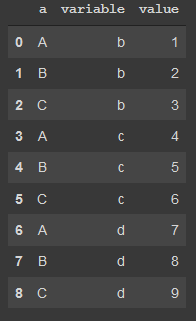

In a sentence or two, explain what the tidy data format is.

What are the types of joins?

# Snazzy Graphs

Pick a graph from FiveThirtyEight and try to recreate it. Focus on the following items:
- All text in the orginal graph (except the watermark) is present in your graph and in the same locations
- All text in your graph is roughly the same size and look of the original graph
- Gridlines, Ticklabels, and tickmark spacing matches
- Coloring and/or style matches.